World Bank API with Python
======

## Brazil and Chile FDI Example

-----

*December 17, 2019*<br>
*@bd_econ*

The World Bank API documentation can be found [here](https://datahelpdesk.worldbank.org/knowledgebase/articles/898581-api-basic-call-structure)

In [1]:
import requests
import pandas as pd

## Parameters/ Settings

In [2]:
base = 'http://api.worldbank.org/countries/'
countries = 'bra;chl'
indicator = 'BX.KLT.DINV.WD.GD.ZS?MRV=25'
url = f'{base}{countries}/indicators/{indicator}&format=json'

## Request the data

In [3]:
r = requests.get(url).json()

In [4]:
country_names = list(set([i['country']['value'] for i in r[1]]))
title = r[1][0]['indicator']['value']

df = (pd.DataFrame({country: pd.Series({i['date']: i['value'] 
                                        for i in r[1] 
                                        if i['country']['value'] == country}) 
                    for country in country_names})
        .astype('float')
        .sort_index())

## Plot the results

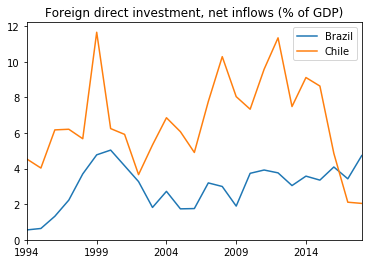

In [5]:
%matplotlib inline
df.plot(title=title);